# Introduction to Neural Networks

## Import packages

In [16]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

import pandas as pd
from keras.layers import *
import keras.callbacks as cb
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [17]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Understanding the image data format

In [19]:
X_train[0].shape

(28, 28)

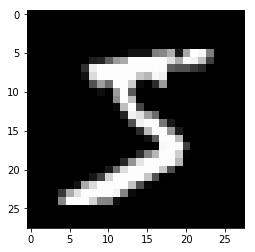

In [20]:
plt.imshow(X_train[0], cmap='gray')

In [21]:
y_train[0]

5

## Preprocessing the image data

In [22]:
image_height, image_width=28,28

covert from shape(60000,28,28) -->shape(60000,784)

In [23]:
X_train = X_train.reshape(60000,image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

In [24]:
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 

In [25]:
#convert int to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [26]:
X_train/=255.0
X_test /=255.0


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Build a model

In [27]:
y_train.shape

(60000,)

In [28]:
#covert to hotcode
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)

(60000, 10)


![title](images/neural-net.png)

In [29]:
model = Sequential()

In [30]:
#first layer
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
#second layer
model.add(Dense(512, activation = 'relu'))
#final layer
#use softmax because we want output have one of 10 classes
model.add(Dense(10, activation = 'softmax'))


## Compile the model

In [31]:
#use categorical_crossentropy because output is 10 classes or 10 bins
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [32]:
512*28*28+512
512*512+512

262656

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Train the model

In [34]:
# Create a TensorBoard logger
RUN_NAME="run 1 with 50 nodes"
#see 2 graph same time, rename folder inside
logger = cb.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    write_graph = True,
    histogram_freq = 0
    #every five passes through the training data, i will log out statistics
)

In [35]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test,y_test),callbacks=[logger])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s - loss: 0.1847 - acc: 0.9437 - val_loss: 0.0998 - val_acc: 0.9676
Epoch 2/20
60000/60000 [==============================] - 20s - loss: 0.0818 - acc: 0.9750 - val_loss: 0.0829 - val_acc: 0.9741
Epoch 3/20
60000/60000 [==============================] - 20s - loss: 0.0551 - acc: 0.9823 - val_loss: 0.0905 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 20s - loss: 0.0442 - acc: 0.9859 - val_loss: 0.0781 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 22s - loss: 0.0355 - acc: 0.9888 - val_loss: 0.0791 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 19s - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0805 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 20s - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0977 - val_acc: 0.9785
Epoch 8/20
60000/60000 [==============================

In [36]:
model.save("trained_model.h5")

In [ ]:
!tensorboard --logdir=path/to/log

## What is the accuracy of the model?

### Plot the accuracy of the training model

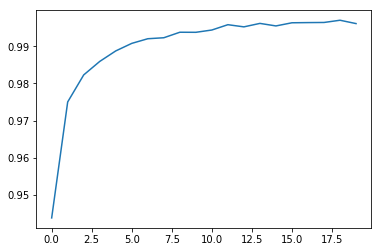

In [37]:
plt.plot(history.history['acc'])


### Plot the accuracy of training and validation set

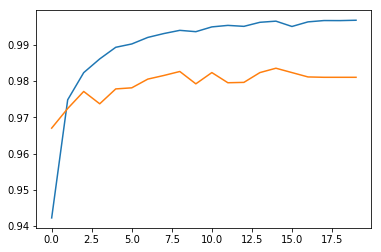

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

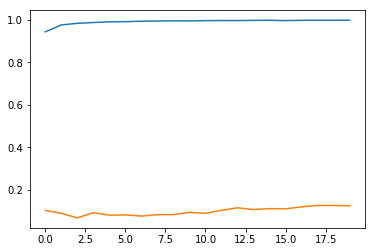

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])

## Evaluating the model

In [55]:
score = model.evaluate(X_test, y_test)
score

 9664/10000 [===========================>..] - ETA: 0s

[0.1263437441547465, 0.981]

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

![title](images/cnn-model.jpg)

## Import the libraries

In [56]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [57]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [60]:
num_classes = 10
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [69]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
#because next use Dense so use Flatten 
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10250     
Total para

In [70]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 375s - loss: 0.4410 - acc: 0.8551 - val_loss: 0.1483 - val_acc: 0.9546
Epoch 2/20
39072/60000 [==================>...........] - ETA: 103s - loss: 0.1186 - acc: 0.9628

KeyboardInterrupt: 

Recall that when using neural networks we got good accuracy.

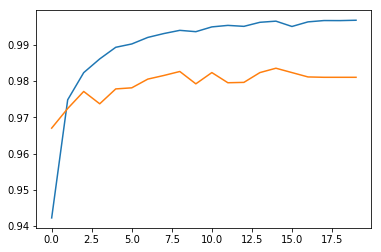

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

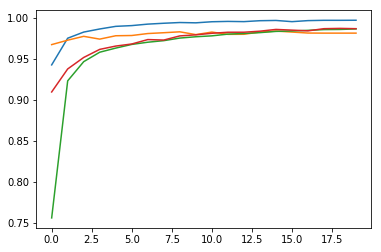

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()